# Ocorrências criminais no Brasil

Weslei Luiz de Paula Pinto

Felipe Menino Carlos

Data: 14 de novembro de 2018

## Sobre

Esta análise foi criada como um dos trabalhos da matéria de Laboratório de bancos de dados, da Fatec SJC.

Os dados aqui utilizados foram disponibilizados [aqui](http://dados.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica), pelo Sistema Nacional de Estatísticas de Segurança Pública e Justiça Criminal (**SINESPJC**).

Todos os scripts utilizados, tanto para a análise quanto para a aquisição dos dados está disponível no [Github](https://github.com/M3nin0/ocorrencias-brasil), estes foram criados para tornar este documento mais simples.

## Análise dos dados

Todo o processo da análise destes dados foram documentados para a fácil replicacão. O processo seguido utiliza ideias gerais de análise exploratória de dados.

Para começar os scripts criados foram carregados para facilitar a análise.

In [1]:
import glob
import pandas as pd
from tool.python.data_utils import *

Primeiro apenas um ano será tratado, para depois expandir a análise para todos os dados disponíveis. O ano escolhido foi 2013.

In [2]:
year = read_year_data(2013)

Com os dados carregados sua estrutura já pode ser observada.

In [3]:
year.head(7)

,regiao,uf,estado,codigo_IBGE,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,1,01/2013,4.0
1,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,2,02/2013,5.0
2,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,3,03/2013,1.0
3,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,4,04/2013,6.0
4,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,5,05/2013,4.0
5,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,6,06/2013,4.0
6,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,7,07/2013,2.0


A coluna **codigo_IBGE** não é interessante nesta análise, portanto será excluida

In [4]:
del(year['codigo_IBGE'])

Para verificar como a estrutura dos dados foi alterada o comando head foi utilizado novamente

In [5]:
year.head(10)

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,1,01/2013,4.0
1,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2,02/2013,5.0
2,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,3,03/2013,1.0
3,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,4,04/2013,6.0
4,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,5,05/2013,4.0
5,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,6,06/2013,4.0
6,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,7,07/2013,2.0
7,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,8,08/2013,1.0
8,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,9,09/2013,5.0
9,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,10,10/2013,1.0


Agora que a estrutura básica já é conhecida, serão verificadas informações sobre as estatísticas gerais destes dados.

In [6]:
year.describe()

,ano,ocorrencias
count,60460.000000,60460.000000
mean,6.334701,7.354848
std,3.453378,30.759189
min,1.000000,1.000000
25%,3.000000,1.000000
50%,6.000000,2.000000
75%,9.000000,4.000000
max,12.000000,975.000000


Com estas estatísticas gerais já é possível começar a gerar perguntas para prosseguir com a análise dos dados. Ao olhar estas informações, surgem algumas perguntas

- Qual o tipo de crime tem a maior quantidade de ocorrência no ano de 2013?
- Qual dos meses tem a maior taxa de cada um dos crimes no conjunto de dados?
- Quais cidades apresentam as maiores quantidades de cada um dos crimes presentes nos dados?

As perguntas acima nos guiarão com a análise destes dados.

### Crime mais frequente em 2013

Para começar será realizada uma análise dos crimes mais frequentes em 2013. 

In [7]:
crime = year.groupby(['crime'])
occurrences = crime.agg({'ocorrencias':sum})
occurrences

,ocorrencias
crime,
Estupro,49856.000
Furto de veículo,187795.905
Homicídio doloso,47141.000
Lesão corporal seguida de morte,1023.000
Roubo de veículo,157057.209
Roubo seguido de morte (latrocínio),1801.000


Veja que neste ano de forma geral o furto de carros foi muito alto! E infelizmente o número de estrupos também foi muito grande. Mas aqui vamos criar uma forma de visualizar estes dados mais facilmente, utilizando um gráfico de barras!

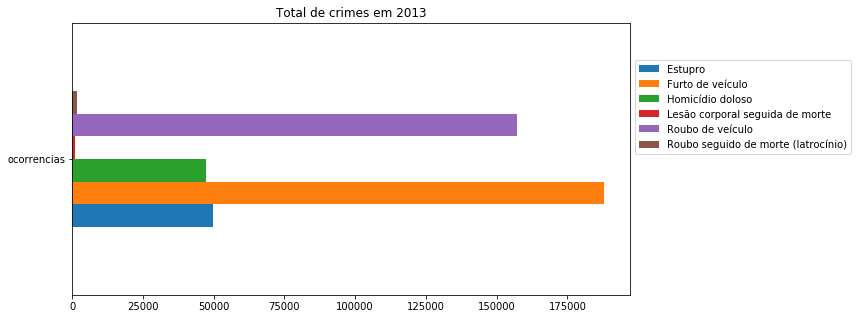

In [33]:
occurrences_barh_plot = occurrences.T.plot.barh(title="Total de crimes em 2013", figsize=(10,5))
occurrences_barh_plot.legend(loc="lower left", bbox_to_anchor=(1, 0.5))
occurrences_barh_plot

Veja, a interpretação tornou-se mais simples! Agora que sabemos qual foi o crime mais cometido no ano de 2013, vamos decobrir como foi a distribuição destas quantidades de ocorrências nos meses.

### Meses e suas taxas de crimes (2013)

Para obter esta informação, os dados serão agrupados primeiro, levando em consideração os meses, e então, contar as ocorrências de cada crime.

In [35]:
crimes_per_month = year.groupby(['mes','crime']).agg({'ocorrencias':sum})
crimes_per_month.head()

ocorrencias
mes     crime                                       
01/2013 Estupro                             4569.000
        Furto de veículo                   16871.305
        Homicídio doloso                    4148.000
        Lesão corporal seguida de morte      101.000
        Roubo de veículo                   13821.362

No caso destes dados há muitos valores, vamos também criar um plot que facilite a visualização e entendimento dos dados.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37858a29e8>,
      dtype=object)

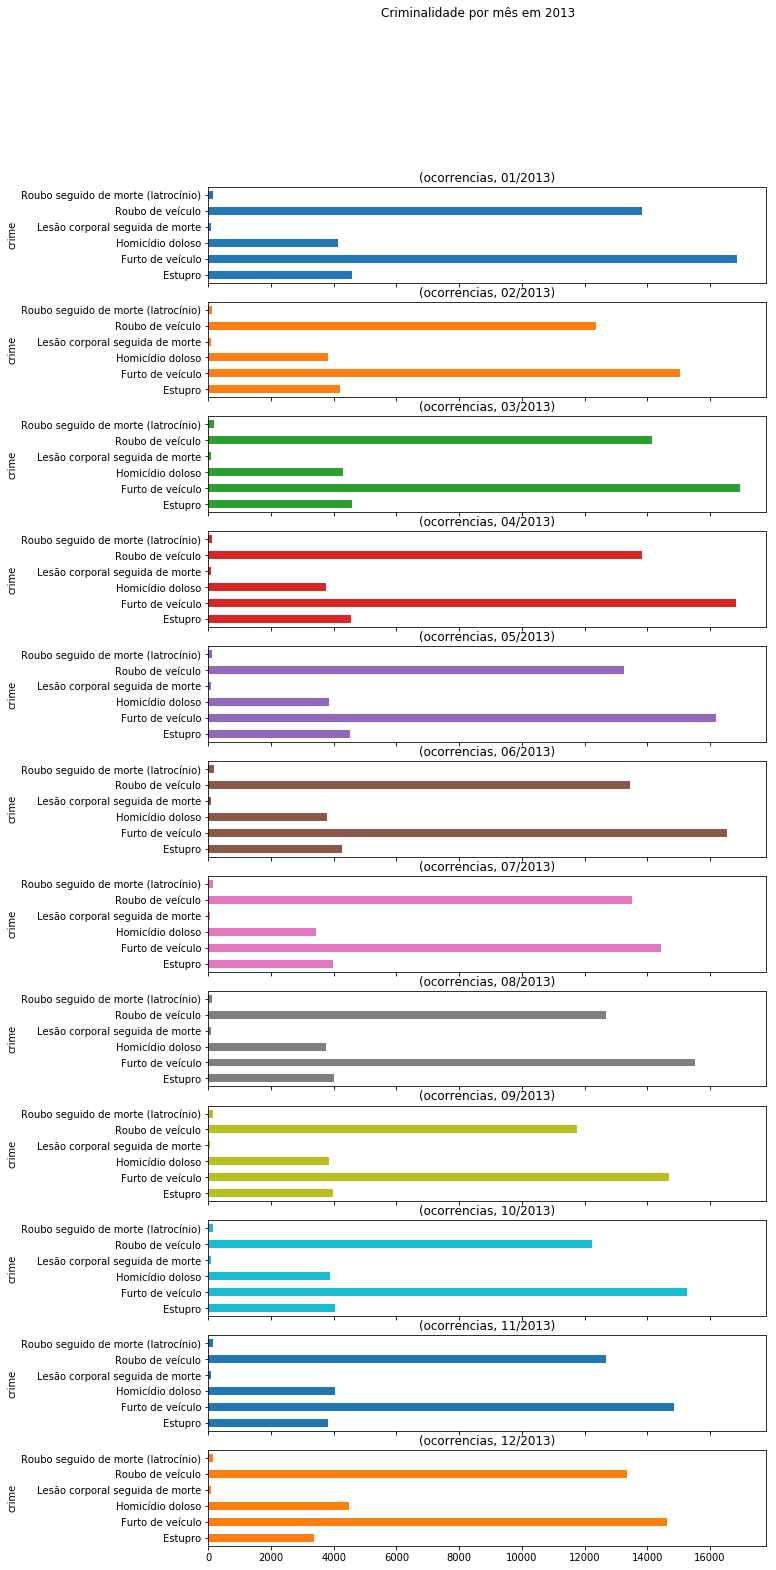

In [36]:
crime_per_month_bar_graph = crimes_per_month.unstack(level=0)
crime_per_month_bar_graph.plot(kind="barh", figsize=(10,25), subplots=True, legend=False, title="Criminalidade por mês em 2013")

Abaixo, outro gráfico foi criado com os mesmos dados, porém com uma abordagem diferente, é realizada uma verificação em como os dados são alterados durante os meses

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f3787831f60>>

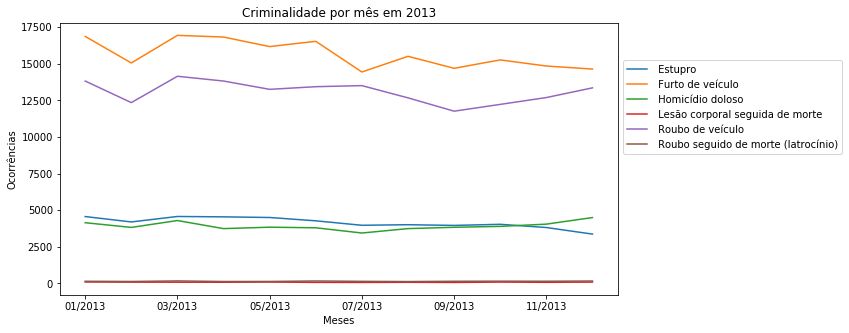

In [11]:
crime_per_month_line_graph = crimes_per_month.unstack(1).plot(kind="line", figsize=(10,5), subplots=False, legend=False, title="Criminalidade por mês em 2013")
legend_month = format_legend(crime_per_month_line_graph.get_legend_handles_labels())
crime_per_month_line_graph.legend(legend_month,loc="lower left", bbox_to_anchor=(1, 0.5))
crime_per_month_line_graph.set_ylabel("Ocorrências")
crime_per_month_line_graph.set_xlabel("Meses")
crime_per_month_line_graph_xlabel = create_month_xlegend(crimes_per_month.unstack(0))
crime_per_month_line_graph.set_xticklabels(crime_per_month_line_graph_xlabel)
crime_per_month_line_graph.plot

Veja que, há um certo padrão na distribuição dos dados, onde certos tipos de crimes apresentam valores muito próximos, aqui, é possível perceber por exemplo que, o furto de carro ao longo de todo o ano de 2013 foi muito alto, além ainda de crimes de lesão corporal e estupro, que mantiveram as mesmas quantidades quase durante o ano todo.  

### Crimes por cidade

Agora será analisado quais cidades tiveram os maiores índices de cada um dos tipos de crime, no ano de 2013.

In [37]:
crimes_per_city = year.groupby(['municipio','crime'], as_index=False).agg({'ocorrencias':sum})
crime_per_city_max = crimes_per_city.groupby(['crime']).agg({'ocorrencias':max})
criteria = ['ocorrencias','crime']
crime_per_city_graph = pd.merge(crime_per_city_max,crimes_per_city,on=criteria)
crime_per_city_graph

,ocorrencias,crime,municipio
0,2900.0,Estupro,São Paulo
1,7661.0,Furto de veículo,Rio De Janeiro
2,1860.0,Homicídio doloso,Fortaleza
3,35.0,Lesão corporal seguida de morte,Fortaleza
4,6470.0,Roubo de veículo,Porto Alegre
5,140.0,Roubo seguido de morte (latrocínio),São Paulo


Pronto! Agora os dados estão agrupados levando em consideração os municípios com a maior quantidade de um determinado tipo de crime, uma visualização será criada para facilitar o entendimento dos dados.

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f378484d358>>

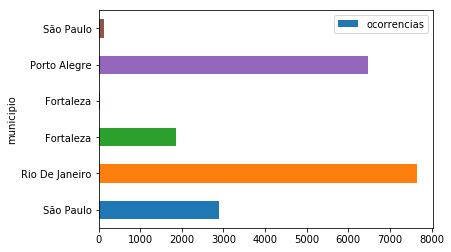

In [49]:
crime_per_city_graph.plot(kind='barh',y='ocorrencias',x='municipio')

Com esta visualização é possível entender que, a cidade com maiores registros de estupro é Sâo Paulo, bem como o Furto de veículo tem as maiores ocorrências no Rio de Janeiro, e assim por diante. 

## Expansão temporal da análise

Bom, diante aos dados de um único ano obtivemos diversas informações interessantes, porém, vamos avançar! Vamos entender os fenômenos destes dados ao decorrer dos anos.

> Veja que esta avaliação será possível já que o **SINESPJC** disponibiliza uma base de dados de 2004 até 2017.
Vale lembrar que, caso você queira, é possível baixar estes dados utilizando o script disponível no [Github](https://github.com/M3nin0/ocorrencias-brasil/tree/master/recuperacao_dados).

Vamos começar carregando todos os dados

In [14]:
data = read_all_data()

Como explicado anteriormente, a coluna codigo_IBGE não é necessária, portanto será excluída novamente

In [15]:
del(data['codigo_IBGE'])

Beleza! Com os dados carregados, vamos novamente visualizar sua estrutura. Este passo é importante para o entendimento dos dados.

In [16]:
data.head()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,1,01/2006,2.0
1,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2,02/2006,2.0
2,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,3,03/2006,1.0
3,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,4,04/2006,2.0
4,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,5,05/2006,1.0


In [17]:
data.tail()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
27092,SUL,SC,Santa Catarina,Balneário Rincão,Estupro,6,06/2017,1.0
27093,SUL,SC,Santa Catarina,Balneário Rincão,Furto de veículo,1,01/2017,5.0
27094,SUL,SC,Santa Catarina,Balneário Rincão,Furto de veículo,2,02/2017,5.0
27095,SUL,SC,Santa Catarina,Balneário Rincão,Furto de veículo,6,06/2017,2.0
27096,SUL,SC,Santa Catarina,Balneário Rincão,Roubo de veículo,2,02/2017,1.0


Os dados não possuem uma coluna com o valor dos anos, portanto esta foi criada a partir da coluna mes com o comando abaixo:

In [18]:
data['ano'] = data['mes'].apply(lambda element: element.split("/")[1])

Para confirmar que a coluna foi alterada os dados foram visualizados novamente

In [19]:
data.head()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,01/2006,2.0
1,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,02/2006,2.0
2,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,03/2006,1.0
3,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,04/2006,2.0
4,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,05/2006,1.0


Veja que há uma varição grande nos meses e anos e ainda, que a estrutura base é a mesma dos dados vistos para um único ano (2013), vamos então começar esta nova etapa de análise.

Agora, vou criar uma `linha do tempo` variando com a quantidade total de ocorrências em cada um dos anos presentes no conjunto de dados.

In [20]:
crime_occurrences = data.groupby(['ano'],as_index=False).agg({'ocorrencias':sum})

Bem, acima apliquei apenas uma função para gerar um coluna com apenas os valores dos anos, vamos agora agrupar os dados pelos anos e então realizar a contagem.


Com os dados agrupados, vamos realizar o plot para visualizar o resultado.

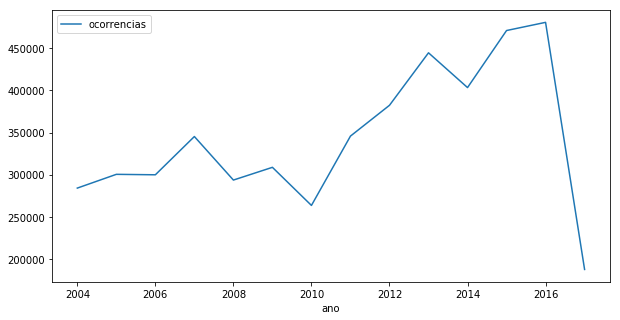

In [21]:
crime_occurrences_xlegend = create_year_xlegend(crime_occurrences.ano)
crime_occurrences.plot(kind="line", x='ano', y='ocorrencias', figsize=(10,5)).set_xticklabels(crime_occurrences_xlegend,rotation=0)
crime_occurrences.plot

Veja que, ao longo dos anos a quantidade de crimes só aumentou, tendo uma queda em 2017. Veja que, a queda em 2017, pode estar vinculada com os dados que estão disponíveis para este, isto porque, em 2017 nem todos os meses estão disponíveis.

Esta informação é bastante interessante, porém, e com relação a cada um dos crimes ? Qual foi sua variação ao longo dos anos, vamos entender isto agora.


<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f3785ac4d68>>

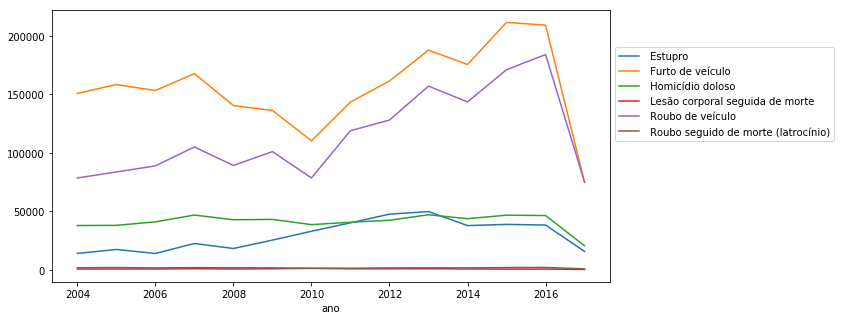

In [22]:
crimes_in_history = data.groupby(['crime','ano']).agg({'ocorrencias':sum})
crimes_in_history_line_graph = crimes_in_history.unstack(0).plot(kind="line",legend=True, subplots=False,figsize=(10,5))
legend_history = format_legend(crime_per_month_line_graph.get_legend_handles_labels())
crimes_in_history_line_graph.legend(legend_history,loc="lower left", bbox_to_anchor=(1, 0.5))
crimes_in_history_xlabel = create_year_xlegend(crimes_in_history.unstack(0).index)
crimes_in_history_line_graph.set_xticklabels(crimes_in_history_xlabel)
crimes_in_history_line_graph.plot

Veja que interessante, conseguimos visualizar a variação no tempo de cada um dos tipos de crimes, sendo os que mais variam `Furto, Roubo, Estupro e Homicídio doloso`.

Ao ver este último gráfico, me surgiu a curiosidade de saber qual os anos apresentaram os maiores números de ocorrências para cada um dos crimes. Vamos fazer isto então. 


In [23]:
max_occurrences_by_year = data.groupby(['crime','ano']).agg({"ocorrencias":sum}).unstack(1).sum()

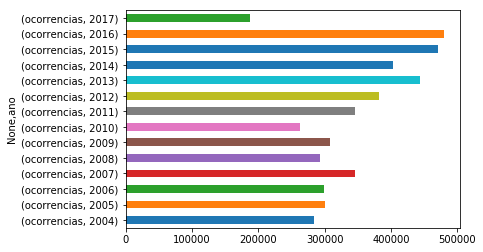

In [24]:
max_occurrences_by_year.plot(kind="barh")

Bem acima apenas agrupei os dados, vamos agora realizar o plot para obter as informações de cada um dos anos e seus crimes.


Como podemos ver no gráfico acima, para todos os crimes, os maiores índices estão entre 2010 e 2016, o que demonstra que este período de tempo representaram muito mais violência que qualquer outro desde 2004.

É importante nos atentarmos aos crimes de lesão corporal e latrocínio, que em todos os resultados apareceram em baixa, isto pode realmente ocorrer, ou mesmo falta de dados podem estar causando esta característica.